# Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# Preparando datos de prueba

In [8]:
X, y, c = make_blobs(500,cluster_std=0.8, centers=4, n_features=2, return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y,
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

In [3]:
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:,0],
        'x2': X_m[:,1],

    }
)


# Visualización de datos

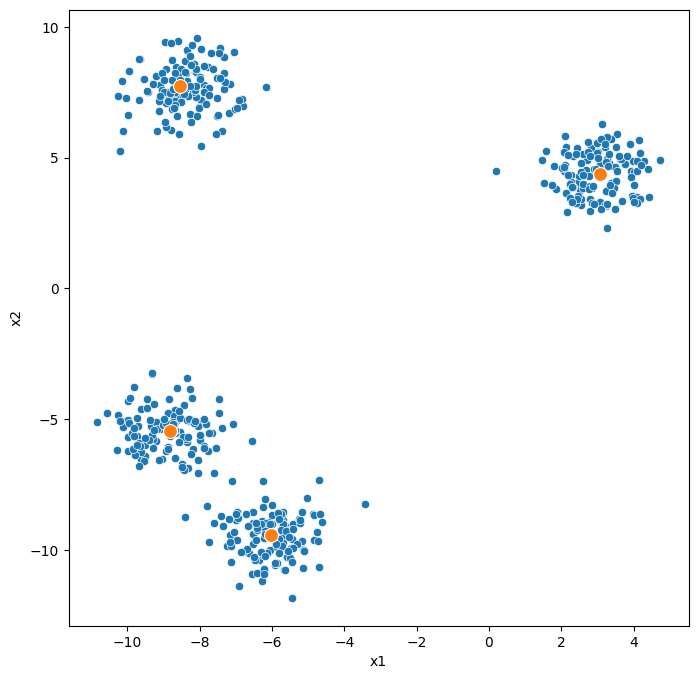

In [9]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2')
sns.scatterplot(data=df_centers, x='x1',y='x2', markers="X", s=100)

plt.show()

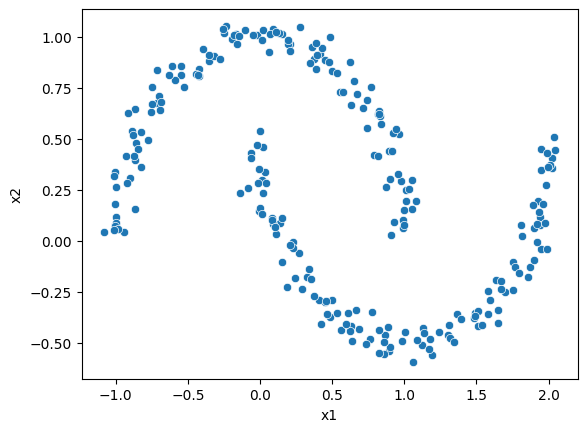

In [10]:
sns.scatterplot(data=df_moons, x="x1", y="x2")
plt.show()

# Implementando DBSCAN

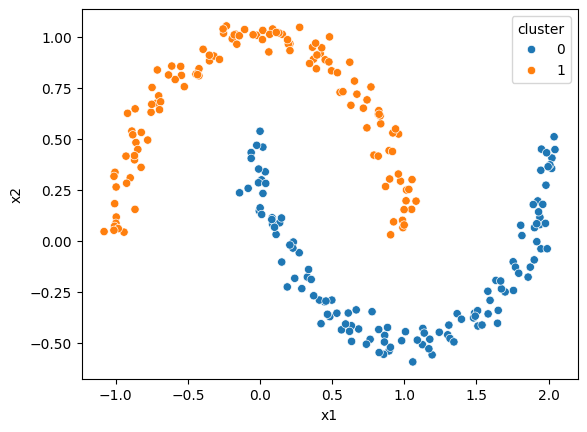

In [15]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict  = dbscan_cluster.fit_predict(X_m)
df_moons["cluster"] = y_m_predict

sns.scatterplot(data=df_moons, x="x1", y="x2", hue="cluster")
plt.show()

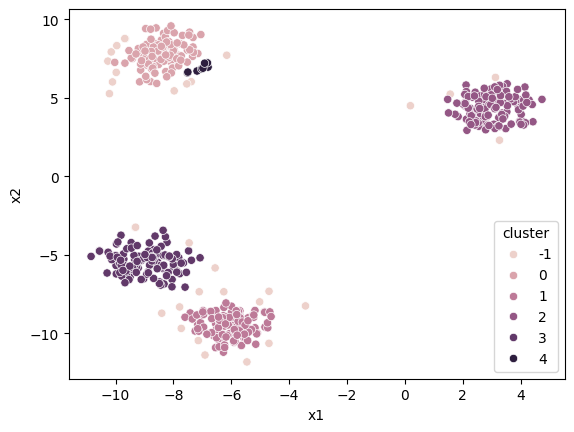

In [22]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
y_predict  = dbscan.fit_predict(X)
df_blobs["cluster"] = y_predict

sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
plt.show()

# Hyperparameters

In [24]:
from sklearn.neighbors import NearestNeighbors

In [25]:
neighbors = NearestNeighbors(n_neighbors=(2*2))
neighbors_fit = neighbors.fit(X)
distance, indices = neighbors_fit.kneighbors(X)

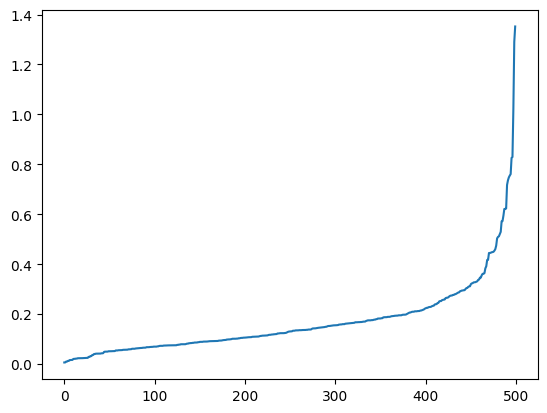

In [31]:
distances = np.sort(distance, axis=0)
distances = distances[:,1]

plt.plot(distances) # Para saber el elipson

In [32]:
eps_values = np.arange(0.25,0.8,0.10)
min_sample = np.arange(2,10)

In [33]:
from itertools import product

In [36]:
dbscan_params = list(product(eps_values,min_sample))
sil_scores = []

for p in dbscan_params:
    y_predict = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X,y_predict))

In [42]:
df_param_tuning = pd.DataFrame.from_records(dbscan_params, columns=["Esp", "Min_sample"])
df_param_tuning["sil_score"]= sil_scores
df_param_tuning

# Para hacerlo una matriz

pivot_data = pd.pivot_table(df_param_tuning, values="sil_score", index="Min_sample", columns="Esp")
pivot_data

Esp,0.25,0.35,0.45,0.55,0.65,0.75
Min_sample,,,,,,
2,-0.076597,-0.032902,0.438060,0.537079,0.686371,0.772148
3,-0.106975,-0.025232,0.467142,0.744499,0.768354,0.772148
4,-0.084724,-0.063134,0.470821,0.740133,0.760345,0.772148
5,-0.158836,-0.044422,0.540915,0.735674,0.755826,0.765499
6,-0.314526,-0.058921,0.382015,0.580184,0.739711,0.754789
7,-0.498008,0.127118,0.563745,0.573518,0.735212,0.748652
8,-0.355122,0.173903,0.517266,0.656109,0.727145,0.748652
9,-0.465335,-0.119989,0.448371,0.617469,0.716823,0.748652


<Axes: xlabel='Esp', ylabel='Min_sample'>

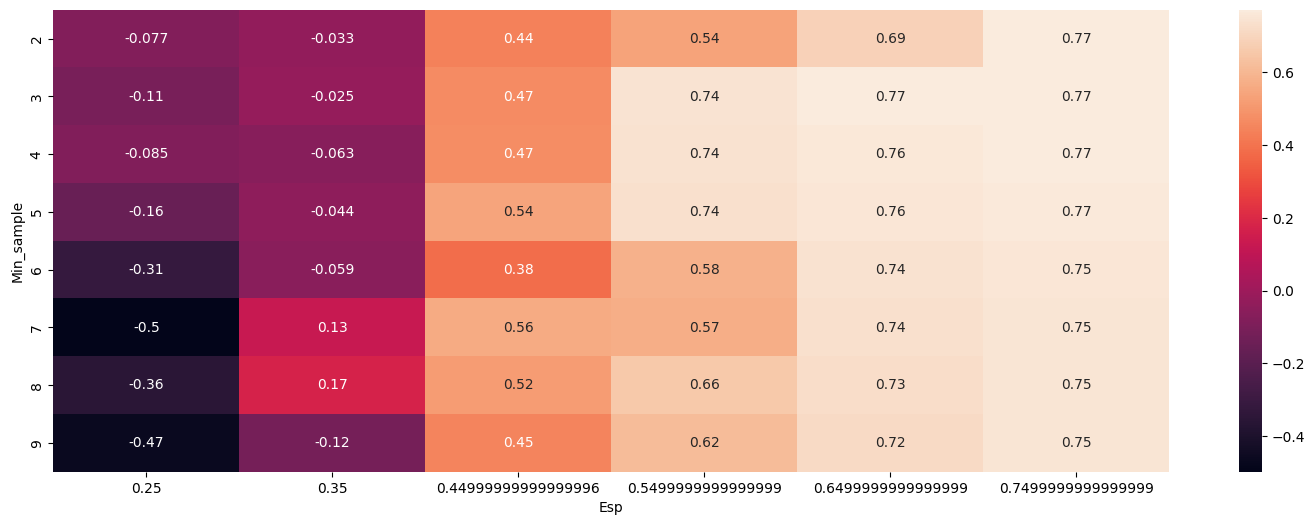

In [45]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={"size":10}, ax=ax)

# Evaluacion de DBSCAN

In [49]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=4)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs["cluster"] = y_predict


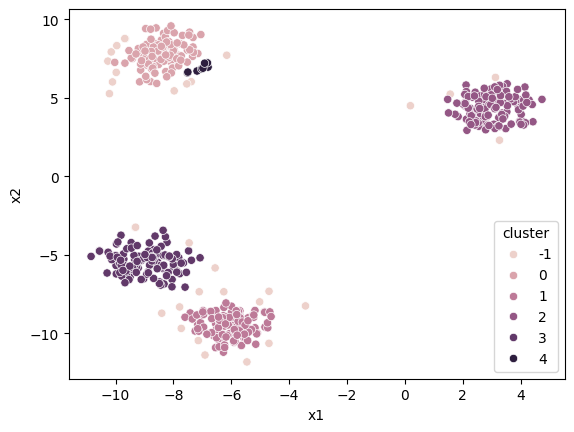

In [50]:
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
plt.show()

For n_clusters = 5 The average silhouette_score is : 0.7683540231735219


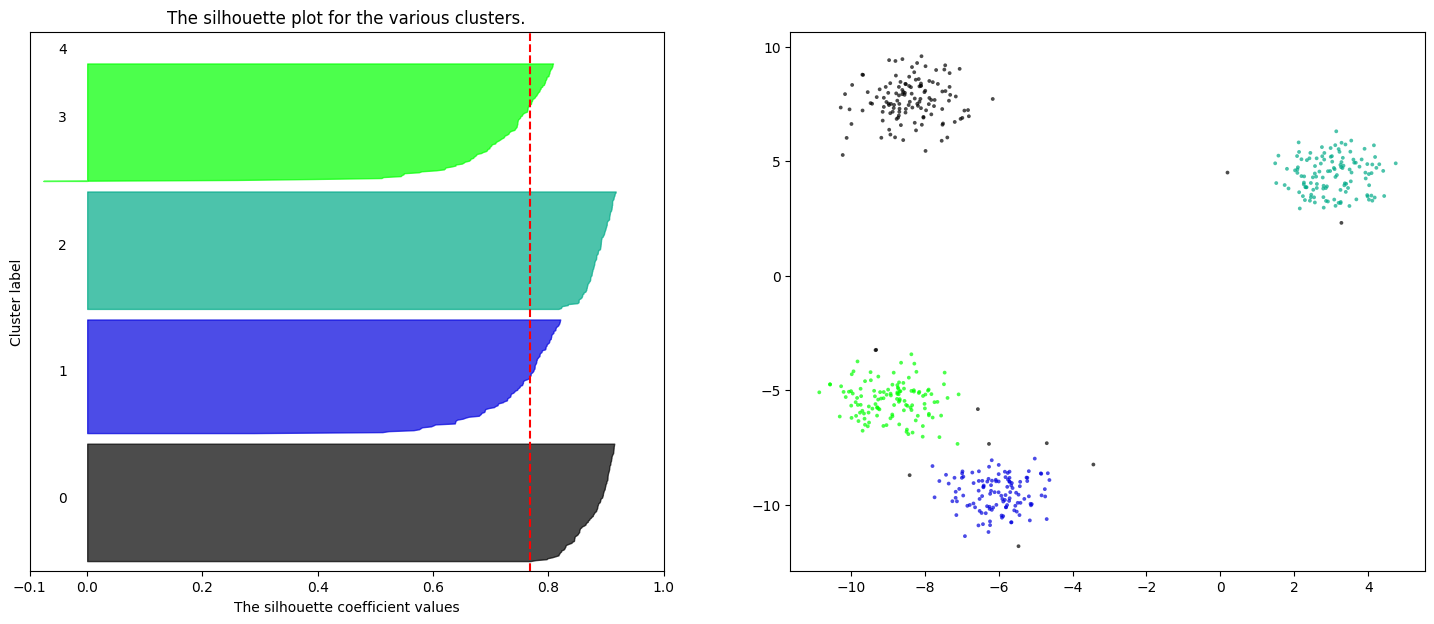

In [54]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.65, min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()